## Iris Dataset Clustering using k-Means and Classification using kNN

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from utils import Info
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

### Configuration

In [5]:
class Config(Info):
    def __init__(self):
        super(Info, self).__init__()
        self.device = 'PC'
        self.dataset = 'Iris'
        self.test_size = 0.2
        self.method = 'kMeans'
        self.k = 2
        self.distance = 'Euclidean'
        self.reduction_method = ["PCA", 2] # method, n_components
        self.iter = 10
    

In [6]:
cig = Config
cig.info()

TypeError: info() missing 1 required positional argument: 'self'

In [3]:
iris = load_iris()

features = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2, shuffle=True, stratify=target)

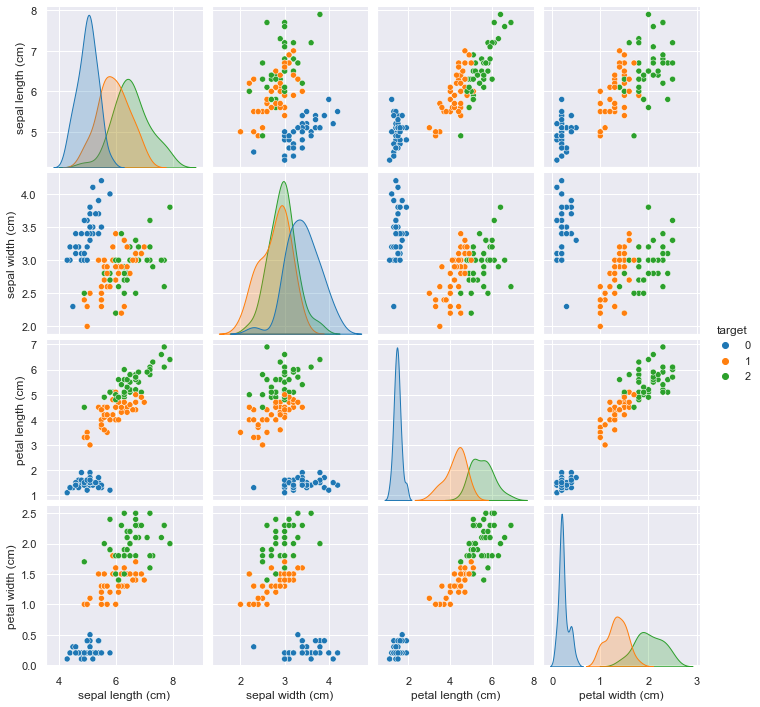

In [432]:
df_feature = pd.DataFrame(x_train, columns=feature_names)
df_target = pd.DataFrame(y_train, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

## Split Data

In [4]:
x_test, y_train, y_test

split_x_train = []
split_y_train = []
split_x_test = []
split_y_test = []

for idx in range(y_train.max() + 1):
    temp_train = np.where(y_train == idx)
    split_x_train.append(x_train[temp_train])
    split_y_train.append(y_train[temp_train])

    temp_test = np.where(y_test == idx)
    split_x_test.append(x_train[temp_test])
    split_y_test.append(y_train[temp_test])

print(np.array(split_x_train).shape)
print(np.array(split_y_train).shape)
print(np.array(split_x_test).shape)
print(np.array(split_y_test).shape)


(3, 40, 4)
(3, 40)
(3, 10, 4)
(3, 10)


In [434]:
center_list = []
split_label_list = []

for idx in range(len(split_x_train)):
    k = 2

    k_means = KMeans(n_clusters=k, random_state=3)
    k_means.fit(split_x_train[idx], split_y_train[idx])

    centers = k_means.cluster_centers_
    centers_label = [0, 1, 2]
    labels = k_means.labels_
    centers_label_name = [3, 3, 4, 4, 5, 5]

    center_list.append(centers)
    split_label_list.append(labels)

center_list = np.array(center_list).reshape(-1, 4)
split_label_list = np.array(split_label_list).reshape(-1)

print(np.array(center_list).shape)
print(np.array(split_label_list).shape)
    
features_cluster = np.concatenate([x_train, center_list], axis=0)
labels_cluster = np.concatenate([labels, centers_label_name], axis=0)

score = metrics.accuracy_score(y_train, split_label_list)


print(features_cluster.shape)
print(labels_cluster.shape)
print("-----" * 10)
print("PC - Clustering Average Accuracy : %f" % score)

(6, 4)
(120,)
(126, 4)
(46,)
--------------------------------------------------
PC - Clustering Average Accuracy : 0.350000


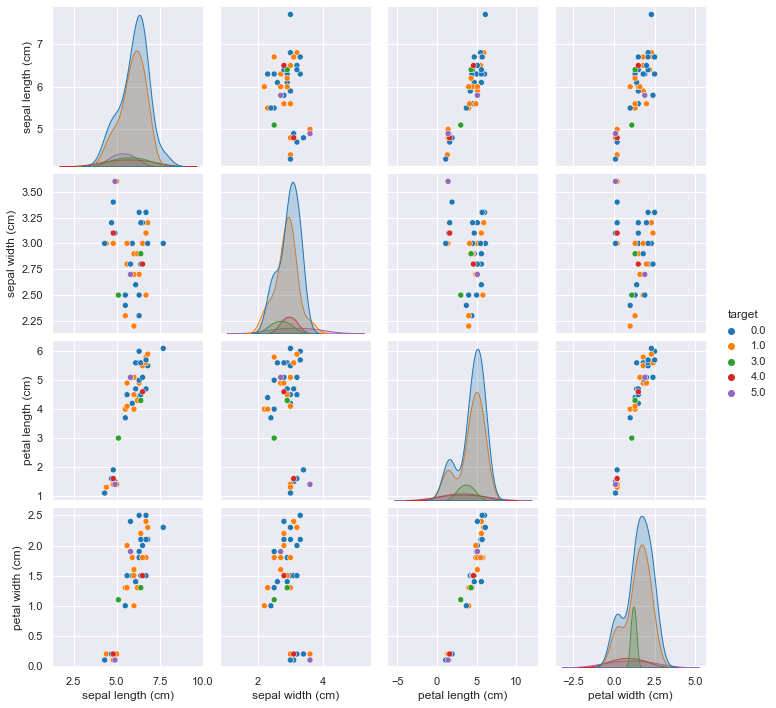

In [435]:
df_feature = pd.DataFrame(features_cluster, columns=feature_names)
df_target = pd.DataFrame(labels_cluster, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

In [7]:
comparison_acc = []
comparison_time = []

## kNN

In [8]:
# kNN
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_neighbors = 1

    knn = KNeighborsClassifier(k_neighbors, weights='distance', metric='euclidean', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

print("PC - kNN Average Accuracy : %f" % mean_acc)
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

PC - kNN Average Accuracy : 0.950000
PC - kNN Classification Time : 0.0085 sec


## NCM

In [9]:
from sklearn.metrics import classification_report

avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)
    
    nc = NearestCentroid()
    nc.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = nc.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

std = np.array(avg_acc).std()

print("PC - kNN Average Accuracy : %f (%.2f)" % (mean_acc, std))
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

PC - kNN Average Accuracy : 0.926667 (0.05)
PC - kNN Classification Time : 0.0002 sec


## k-Means & kNN

In [10]:
# k-Means & kNN
avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 2

    split_x_train = []
    split_y_train = []
    split_center_list = []
    split_label_list = []

    for idx in range(y_train.max() + 1):
        temp_train = np.where(y_train == idx)
        split_x_train.append(x_train[temp_train])
        split_y_train.append(y_train[temp_train])

        temp_test = np.where(y_test == idx)
        split_x_test.append(x_train[temp_test])
        split_y_test.append(y_train[temp_test])


        start1 = time.perf_counter()
        k_means = KMeans(n_clusters=k_cluster, random_state=seed)
        k_means.fit(split_x_train[idx], split_y_train[idx])
        end1 = time.perf_counter() - start1

        split_center_list.append(k_means.cluster_centers_)
        for n in range(k_cluster):
            split_label_list.append(idx)

    split_center_list = np.array(split_center_list).reshape(-1, 4)
    split_label_list = np.array(split_label_list).reshape(-1)

    k_neighbors = 1

    knn = KNeighborsClassifier(k_neighbors, weights='distance', metric='euclidean', n_jobs=-1)
    knn.fit(split_center_list, split_label_list)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")

PC - k-means & kNN Average Accuracy : 0.940000
PC - Clustering Time : 0.0209 sec
PC - Classification Time : 0.0060 sec
PC - Total Time : 0.0269 sec


## PCA Feature 3 & k-Means & kNN

In [11]:
# PCA feature 3 & k-means & kNN
pca = PCA(n_components=3)
features = pca.fit(iris.data).transform(iris.data)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 2

    split_x_train = []
    split_y_train = []
    split_center_list = []
    split_label_list = []

    for idx in range(y_train.max() + 1):
        temp_train = np.where(y_train == idx)
        split_x_train.append(x_train[temp_train])
        split_y_train.append(y_train[temp_train])

        temp_test = np.where(y_test == idx)
        split_x_test.append(x_train[temp_test])
        split_y_test.append(y_train[temp_test])


        start1 = time.perf_counter()
        k_means = KMeans(n_clusters=k_cluster, random_state=seed)
        k_means.fit(split_x_train[idx], split_y_train[idx])
        end1 = time.perf_counter() - start1

        split_center_list.append(k_means.cluster_centers_)
        for n in range(k_cluster):
            split_label_list.append(idx)

    split_center_list = np.array(split_center_list).reshape(-1, 3)
    split_label_list = np.array(split_label_list).reshape(-1)

    k_neighbors = 1

    knn = KNeighborsClassifier(k_neighbors, weights='distance', metric='euclidean', n_jobs=-1)
    knn.fit(split_center_list, split_label_list)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 3 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 3 & k-means & kNN Average Accuracy : 0.936667
PC - Clustering Time : 0.0217 sec
PC - Classification Time : 0.0062 sec
PC - Total Time : 0.0280 sec


## PCA Feature 2 & k-Means & kNN

In [441]:
# PCA feature 3 & k-means & kNN
pca = PCA(n_components=2)
features = pca.fit(iris.data).transform(iris.data)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 2

    split_x_train = []
    split_y_train = []
    split_center_list = []
    split_label_list = []

    for idx in range(y_train.max() + 1):
        temp_train = np.where(y_train == idx)
        split_x_train.append(x_train[temp_train])
        split_y_train.append(y_train[temp_train])

        temp_test = np.where(y_test == idx)
        split_x_test.append(x_train[temp_test])
        split_y_test.append(y_train[temp_test])


        start1 = time.perf_counter()
        k_means = KMeans(n_clusters=k_cluster, random_state=seed)
        k_means.fit(split_x_train[idx], split_y_train[idx])
        end1 = time.perf_counter() - start1

        split_center_list.append(k_means.cluster_centers_)
        for n in range(k_cluster):
            split_label_list.append(idx)

    split_center_list = np.array(split_center_list).reshape(-1, 2)
    split_label_list = np.array(split_label_list).reshape(-1)

    k_neighbors = 1

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(split_center_list, split_label_list)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 2 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 2 & k-means & kNN Average Accuracy : 0.940000
PC - Clustering Time : 0.0216 sec
PC - Classification Time : 0.0062 sec
PC - Total Time : 0.0278 sec


## Method Comparison

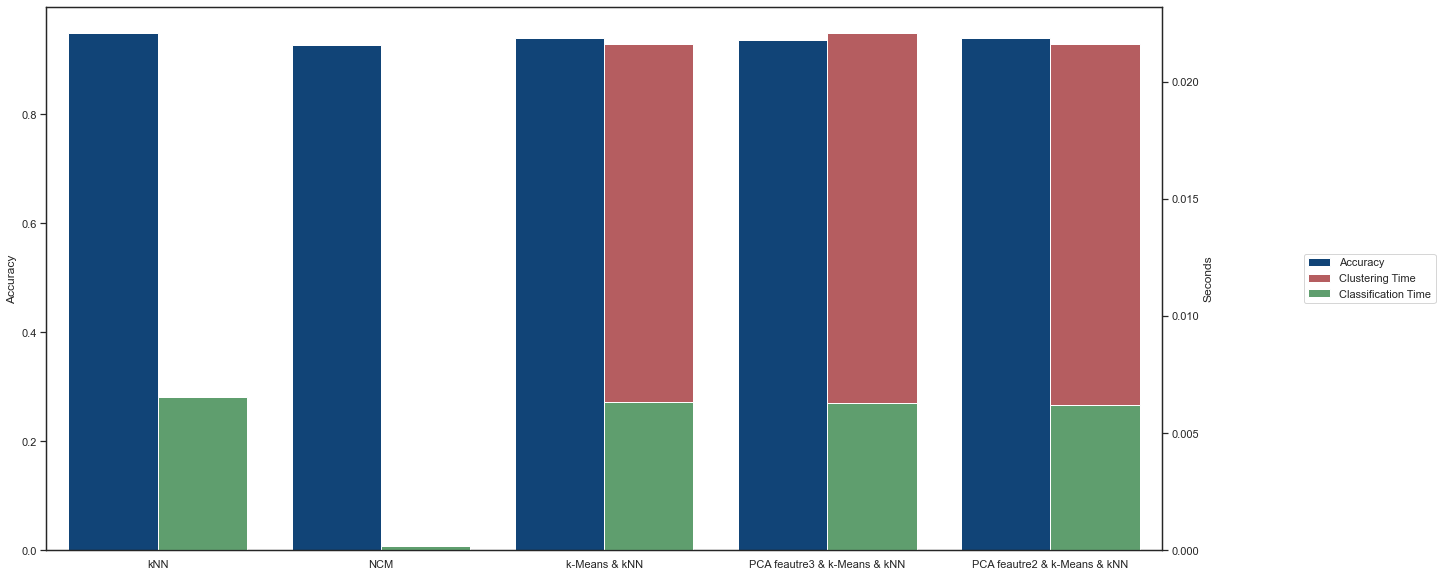

In [442]:
df_stack = pd.DataFrame(dict(
    score = [comparison_acc[0], comparison_acc[1], comparison_acc[2], comparison_acc[3], comparison_acc[4]],
    cluster = [0, 0, comparison_time[2], comparison_time[4], comparison_time[6]],
    # cluster = [0, 0, 0, 0, 0],
    classifier = [comparison_time[0], comparison_time[1], comparison_time[3], comparison_time[5], comparison_time[7]]
))

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"],
            y="score",
            data=df_stack,
            label="Accuracy",
            color='#004488',
            ax=ax1)

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="cluster",
            data=df_stack,
            label="Clustering Time",
            color='r',
            ax=ax2)

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="classifier",
            data=df_stack,
            label="Classification Time",
            color='g',
            ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

width_scale = 0.5

for bar in ax1.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

for bar_containers in ax2.containers:
    for bar in bar_containers:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)

plt.legend(lines, labels, loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()
sns.set()